       continent  revenue
0           Asia     3380
1         Europe      730
2  North America     2200
3  South America     1750


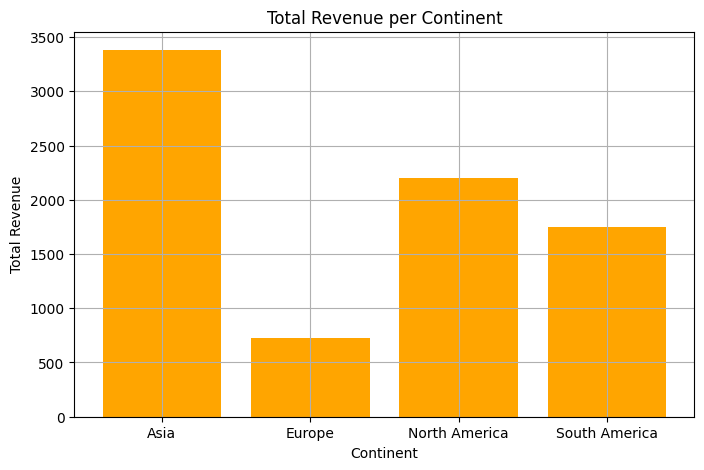

In [2]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

# Unzip sales_data_by_country.zip
with zipfile.ZipFile("C:/Users/Monika/Documents/sales_data_by_country (1).zip", "r") as zip_ref:
    zip_ref.extractall("sales_data_by_country")


# Read and merge CSVs
folder_path = "sales_data_by_country"
df_list = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file))
        df_list.append(df)

sales_df = pd.concat(df_list, ignore_index=True)

# Calculate revenue
sales_df["revenue"] = sales_df["quantity"] * sales_df["price"]

# Add continent
continent_map = {
    "India": "Asia",
    "Japan": "Asia",
    "USA": "North America",
    "Germany": "Europe",
    "Brazil": "South America"
}
sales_df["continent"] = sales_df["country"].map(continent_map)

# Total revenue per continent
continent_revenue = sales_df.groupby("continent")["revenue"].sum().reset_index()
print(continent_revenue)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(continent_revenue["continent"], continent_revenue["revenue"], color="orange")
plt.xlabel("Continent")
plt.ylabel("Total Revenue")
plt.title("Total Revenue per Continent")
plt.grid(True)
plt.show()
